In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import plot_confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1708 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1678 - accuracy: 0.9374
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1634 - accuracy: 0.9388
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1607 - accuracy: 0.9389
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1554 - accuracy: 0.9405
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1525 - accuracy: 0.9427
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1479 - accuracy: 0.9439
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1448 - accuracy: 0.9450
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1456 - accuracy: 0.9453
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3963 - accuracy: 0.8896 - 886ms/epoch - 3ms/step

Test accuracy: 0.8895999789237976


In [44]:
model.save('fashion_mnist_ann.h5')

In [45]:
model = load_model('fashion_mnist_ann.h5')

In [29]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [30]:
predictions[0]

array([4.2704291e-14, 1.4715852e-17, 5.6968703e-17, 2.4794809e-18,
       7.1070141e-16, 3.8280145e-08, 5.6609584e-15, 1.4101557e-03,
       1.0738545e-12, 9.9858981e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [40]:
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

classifier = estimator(model, class_names)

313/313 [==============================] - 1s 3ms/step


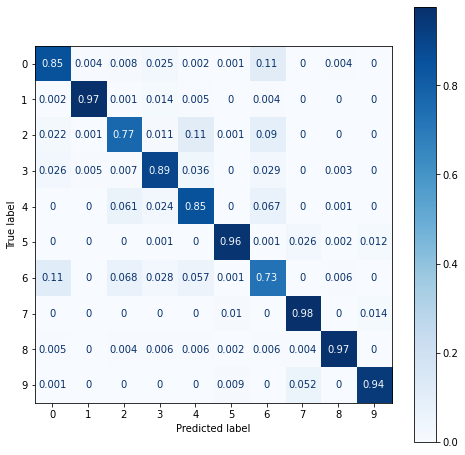

In [43]:
plot_confusion_matrix(estimator=classifier, X=test_images, y_true=test_labels, 
                      cmap='Blues', normalize='true', ax=plt.subplots(figsize=(8,8))[1])

In [33]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [34]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

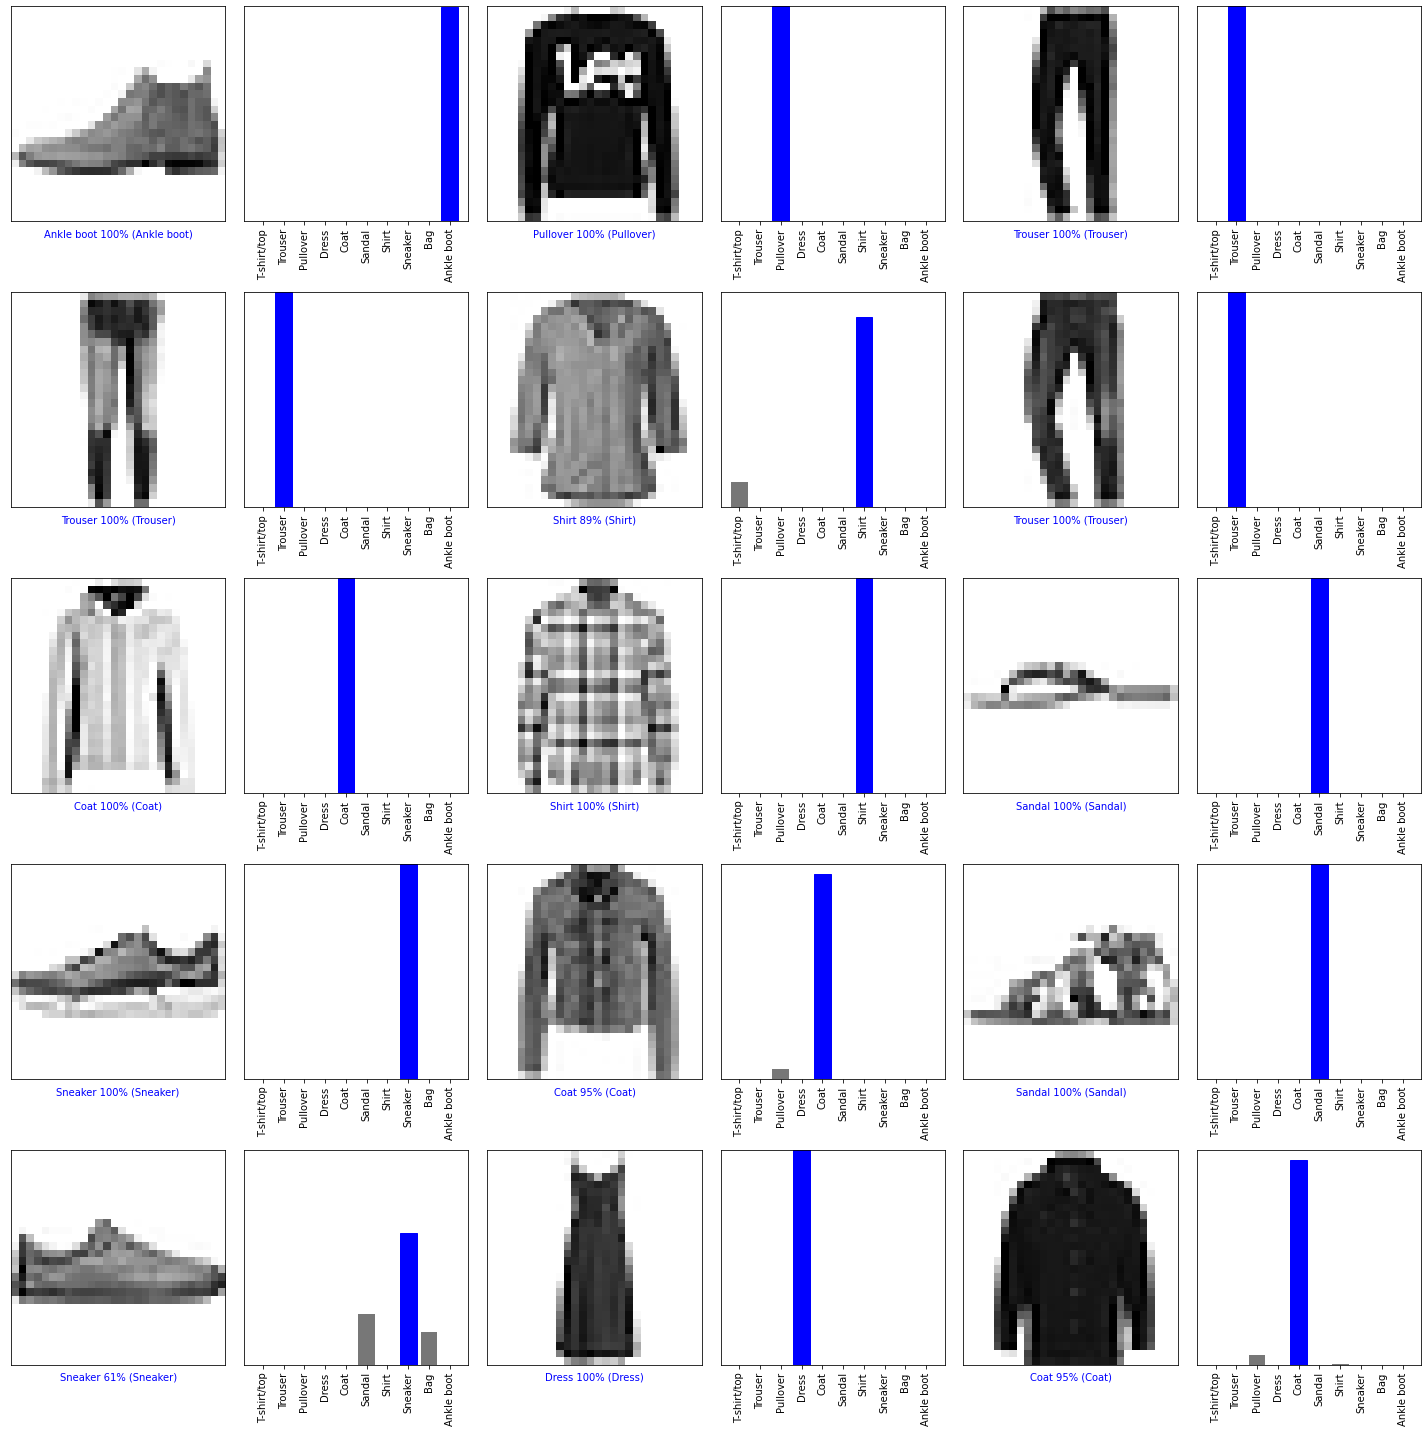

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=90)
plt.tight_layout()
plt.show()

(28, 28)


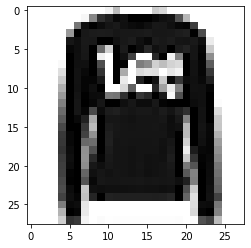

In [36]:
img = test_images[1]

print(img.shape)
plt.imshow(img,cmap=plt.cm.binary)
plt.show()

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 35ms/step
[[1.0093704e-07 8.2260041e-28 9.9982411e-01 2.8148681e-15 1.7087127e-04
  9.1166762e-23 5.0059994e-06 2.9908077e-28 2.0471994e-14 2.0648828e-13]]


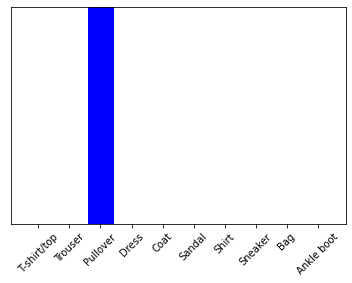

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2